In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

In [3]:
#load data set
df=sns.load_dataset('tips')

In [4]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [5]:
np.min(df['total_bill'])

3.07

In [6]:
np.median(df['total_bill'])

17.795

In [7]:
np.max(df['total_bill'])

50.81

In [8]:
statistics.mode(df['total_bill'])

13.42

In [9]:
df.describe()   #to find all columns 

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

<AxesSubplot:xlabel='total_bill'>

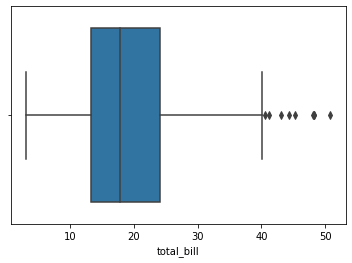

In [10]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

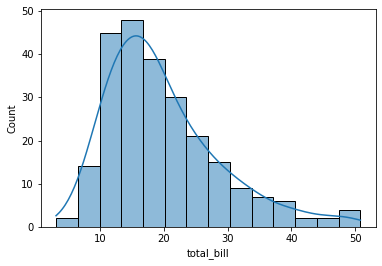

In [11]:
sns.histplot(df['total_bill'],kde='true')

In [12]:
df1=sns.load_dataset('iris')

In [13]:
df1.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<AxesSubplot:xlabel='sepal_length'>

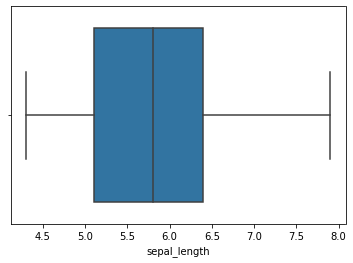

In [14]:
sns.boxplot(df1['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

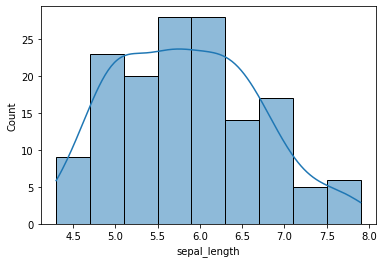

In [15]:
sns.histplot(df1['sepal_length'],kde='true')

<AxesSubplot:xlabel='sepal_width'>

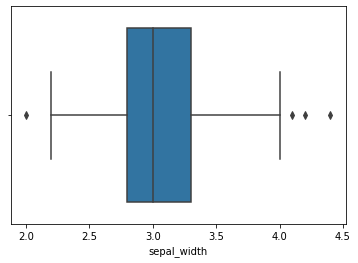

In [16]:
sns.boxplot(df1['sepal_width'])

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

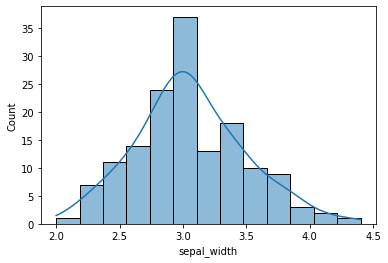

In [17]:
sns.histplot(df1['sepal_width'],kde='true')

<AxesSubplot:xlabel='sepal_width', ylabel='count'>

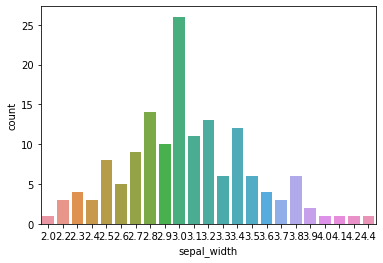

In [18]:
sns.countplot(df1['sepal_width'])

<AxesSubplot:xlabel='species', ylabel='count'>

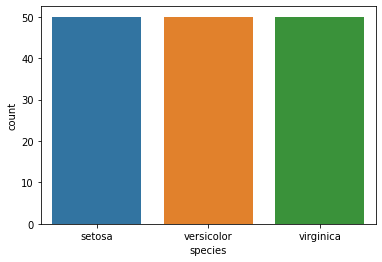

In [19]:
sns.countplot(df1['species'])

In [20]:
np.percentile(df1['sepal_width'],[25,75])

array([2.8, 3.3])

In [21]:
#define new dataset
#dataset=[12,13,121,14,15,16,17,12,23,21,22,28,21,13,14,121,199,20,22,13,14,15,16,121,119,17,18,11]

## Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

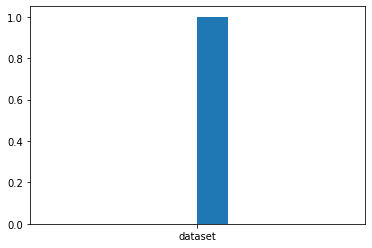

In [22]:
plt.hist('dataset')

In [23]:
## Z_SCORE

outliers=[]

def detect_outliers(data):
    threshold=2  # 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)
            
    return outliers

In [24]:
detect_outliers(dataset)

[102, 107, 108]

## IQR
### 1.Sort the data
### 2.Calculate Q1 aqnd Q3
### 3.IQR(Q3-Q1)
### 4.Find the Lower fence(q1-1.5(iqr))
### 5.Find the upper fence(q3+1.5(iqr))

In [25]:
d_set=sorted(dataset)

In [26]:
#d_set

In [27]:
Q1,Q3=np.percentile(dataset,[25,75])

In [28]:
print(Q1,Q3)

12.0 15.0


In [29]:
IQR=Q3-Q1
print(IQR)

3.0


In [30]:
# Lower and Higher fence
lower_fence=Q1-(1.5*IQR)
higher_fence=Q3+(1.5*IQR)
print(lower_fence,higher_fence)

7.5 19.5


In [31]:
#before removing outliers...
print(d_set)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [32]:
# FIND OUTLIERS USING IQR......

def outliers_via_iqr(lower_fence, higher_fence, data): 
    outliers = []
    for i in dataset:
        if i > higher_fence or i < lower_fence:
            outliers.append(i) 
    return outliers

In [33]:
outliers_via_iqr(7.5,19.5,dataset)

[102, 107, 108]

<AxesSubplot:>

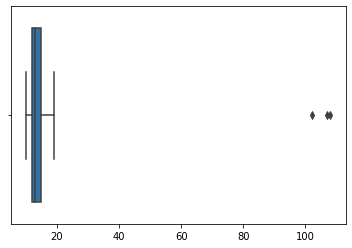

In [34]:
sns.boxplot(dataset)

In [39]:
# Removig outliers...
for i in d_set:
    if i<7.5 or i>19.5:
        d_set.remove(i)
    else:
        continue
      

In [40]:
print(d_set)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19]


<AxesSubplot:>

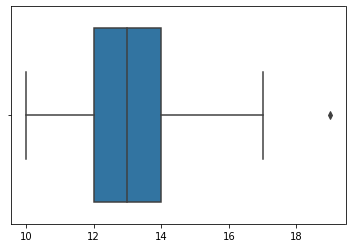

In [41]:
sns.boxplot(d_set)